<a href="https://colab.research.google.com/github/mamiruco/kaggle-house-prices-advanced-regression-techniques/blob/main/house_prices_advanced_regression_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic codes

In [ ]:
def print_df_info(df):
    for column in df.columns:
        unique_count = df[column].nunique()
        unique_values = df[column].unique()
        unique_values_str = str(unique_values)
        unique_values_str_limited = unique_values_str[:50]
        print(f"{column}, [{df[column].dtype}], {unique_count}, {unique_values_str_limited}")
    return

# ◆ [Pace] 1. Plan Stage
・Understand your data in the problem context

1.1. mport packages

1.2. Load dataset head()

1.3 Data Exploration (Initial EDA and data cleaning) info(), describe(), columns, isna().sum(), duplicated().sum()

1.4 ?? Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

1.5 ?? Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

1.4 Check outliers
boxplot
2575



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/10_development/machine_learning/house-prices-advanced-regression-techniques

/content/drive/My Drive/10_development/machine_learning/house-prices-advanced-regression-techniques


In [ ]:
import numpy as np
import pandas as pd



In [ ]:
import seaborn as sns
sns.set()

In [ ]:
df_train = pd.read_csv('data/train.csv')


#df_result = pd.DataFrame()
#df_result['Id'] = df_test['Id']

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print(df_train.shape)
#print(df_test.shape)

(1460, 81)


In [ ]:
#pd.set_option('display.max_rows', 10)
#print(train_df.dtypes)

In [ ]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#print(df_test.info())

# ◆ [pAce] 2.Analyze Stage
・EDA(Explanatory Data Analysis: 探索的データ分析), check model assumptions & select model

・Perform EDA (analyze relationships between variables)

・まずはデータに触れてみて、データを視覚化したり、データのパターンを探したり、特徴量やターゲットの関係性/相関性を感じるとる

・2.1.Data Exploration (Continue EDA)

・2.2.Data visualizations

・2.3.Get insights


In [ ]:
df_test = pd.read_csv('data/test.csv')
df_test.head(2000)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
print(df_test.shape)

(1459, 80)


In [ ]:
print(df_train['SalePrice'])

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [ ]:
# 3 データ前処理
#今回、学習用データセットと予測用データセットを結合して 同時に前処理を行います。(ただし、ここでは予測データは全ての行を残す必要があるため、外れ値の除去はしない。)
all_df = pd.concat([df_train.drop(columns='SalePrice'),df_test])
all_df.head(3000)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
print(df_train['SalePrice'])

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [ ]:
from pandas import DataFrame
data1=DataFrame([[1,2,3],[4,5,6],[7,8,9],[10,11,12]],
              columns=['aa','bb','cc'],
              index=[0,1,2,9])
data1.head(10)


,aa,bb,cc
0,1,2,3
1,4,5,6
2,7,8,9
9,10,11,12


In [ ]:
data2=DataFrame([[100,200],[400,500],[700,800]],
              columns=['aa','bb'],
              index=[0,1,2])
data2.head(10)

,aa,bb
0,100,200
1,400,500
2,700,800


In [ ]:
#data3 = pd.concat([data1, data2], axis=1)
data3 = pd.concat([data1, data2])
data3.head(10)

,aa,bb,cc
0,1,2,3.0
1,4,5,6.0
2,7,8,9.0
9,10,11,12.0
0,100,200,NaN
1,400,500,NaN
2,700,800,NaN


In [ ]:
print(data3.shape)
#print(data1.index[0])
print(data1.shape[0])

(7, 3)
4


In [ ]:
#data1 = pd.merge(data3.iloc[data1.index[0]:data1.index[-1]],data1['cc'],left_index=True,right_index=True)
data1b = data3[:data1.shape[0]]
data1b.head(10)

,aa,bb,cc
0,1,2,3.0
1,4,5,6.0
2,7,8,9.0
9,10,11,12.0


In [ ]:
print(data1b.index[0])
print(data1b.index[-1])
#print(data1['cc'])

0
9


In [ ]:
data2b = data3[data1.shape[0]:]
data2b.head(10)

,aa,bb,cc
0,100,200,NaN
1,400,500,NaN
2,700,800,NaN


In [ ]:
# locとilocについて
# https://aiacademy.jp/media/?p=1551
# print(df.iloc[1:2])# index指定が可能

# まとめると、
# locは行名（インデックスラベル）もしくは列名（カラムラベル）を指定する
# ilocは行や列の番号（インデックス）を指定するということ

# いろいろな結合について
# https://arakan-pgm-ai.hatenablog.com/entry/2020/05/27/000000

In [ ]:
print(df_train.shape)
print(df_test.shape)
print(all_df.shape)

(1460, 81)
(1459, 80)
(2919, 80)


In [ ]:
"""
df = df_train.drop([
    # remove the independent variables that are highly correlated with each other
    'GarageCars',
    'TotRmsAbvGrd',
    'GarageYrBlt',
    '1stFlrSF',
    '2ndFlrSF',
    #'BsmtUnfSF',
    'BedroomAbvGr',

    # remove the other variables that are not good for prediction like "OverallCond"
    'MSSubClass', # ?
    'OverallCond', # What the difference between OverallQual ?
    'BsmtFinSF1', # I prefer to use BsmtFinSFFull
    'BsmtFinSF2', # I prefer to use BsmtFinSFFull
    'LowQualFinSF', # ?
    'BsmtHalfBath', # ?
    'HalfBath', # I don't konw about it in Japan
    'KitchenAbvGr', #
    'EnclosedPorch', # What's this?
    '3SsnPorch', # What's this?
    'ScreenPorch', # What's this?
    'PoolArea', #
    'MiscVal', #
    'MoSold', #
    'YrSold' # memo: 2006, 2007, 2008, 2009, 2010
    #'SalePrice'
    ], axis=1)
"""

'\ndf = df_train.drop([\n    # remove the independent variables that are highly correlated with each other\n    \'GarageCars\',\n    \'TotRmsAbvGrd\',\n    \'GarageYrBlt\',\n    \'1stFlrSF\',\n    \'2ndFlrSF\',\n    #\'BsmtUnfSF\',\n    \'BedroomAbvGr\',\n                    \n    # remove the other variables that are not good for prediction like "OverallCond"\n    \'MSSubClass\', # ?\n    \'OverallCond\', # What the difference between OverallQual ?\n    \'BsmtFinSF1\', # I prefer to use BsmtFinSFFull\n    \'BsmtFinSF2\', # I prefer to use BsmtFinSFFull\n    \'LowQualFinSF\', # ?\n    \'BsmtHalfBath\', # ?\n    \'HalfBath\', # I don\'t konw about it in Japan\n    \'KitchenAbvGr\', # \n    \'EnclosedPorch\', # What\'s this?\n    \'3SsnPorch\', # What\'s this?\n    \'ScreenPorch\', # What\'s this?\n    \'PoolArea\', #\n    \'MiscVal\', #\n    \'MoSold\', #\n    \'YrSold\' # memo: 2006, 2007, 2008, 2009, 2010\n    #\'SalePrice\'\n    ], axis=1)\n'

In [ ]:
# 3.1　一部の数字が入っている変数を文字列に変換
# 数字が入っているが、数字の大小関係が予測に影響を与えない方が良いものはカテゴリ変数にする https://qiita.com/muscle_nishimi/items/901ed94f3cdf1c8d893a
def convert_number2category(df, number2category_list):
    #number2category_list = ['MSSubClass','YrSold','MoSold']
    for column in number2category_list:
        df[column] = df[column].astype(str)

convert_number2category(all_df, ['MSSubClass','YrSold','MoSold'])

In [ ]:
#3.2　欠損値の処理
# 変数の型ごとに欠損値の扱いが異なるため、変数ごとに処理
for column in all_df.columns:
    # dtypeがobjectの場合、文字列の変数
    if all_df[column].dtype=='O':
        all_df[column] = all_df[column].fillna('None')
    # dtypeがint , floatの場合、数字の変数
    else:
        all_df[column] = all_df[column].fillna(0)

In [ ]:
# 3.3　特徴量エンジニアリング Feature Engineering
# 特徴量エンジニアリングによりカラムを追加する関数
"""
def add_new_columns(df):
    # 建物内の総面積 = 1階の面積 + 2階の面積 + 地下の面積
    df["TotalSF"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"]

    # 一部屋あたりの平均面積 = 建物の総面積 / 部屋数
    df['AreaPerRoom'] = df['TotalSF']/df['TotRmsAbvGrd']

    # 築年数 + 最新リフォーム年 : この値が大きいほど値段が高くなりそう
    df['YearBuiltPlusRemod']=df['YearBuilt']+df['YearRemodAdd']

    # お風呂の総面積
    # Full bath : 浴槽、シャワー、洗面台、便器全てが備わったバスルーム
    # Half bath : 洗面台、便器が備わった部屋)(シャワールームがある場合もある)
    # シャワーがない場合を想定してHalf Bathには0.5の係数をつける
    df['TotalBathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

    # 合計の屋根付きの玄関の総面積
    # Porch : 屋根付きの玄関 日本風にいうと縁側
    df['TotalPorchSF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])

    # プールの有無
    df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

    # 2階の有無
    df['Has2ndFloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

    # ガレージの有無
    df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

    # 地下室の有無
    df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

    # 暖炉の有無
    df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# カラムを追加
add_new_columns(all_df)
"""

'\ndef add_new_columns(df):\n    # 建物内の総面積 = 1階の面積 + 2階の面積 + 地下の面積\n    df["TotalSF"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"]\n\n    # 一部屋あたりの平均面積 = 建物の総面積 / 部屋数\n    df[\'AreaPerRoom\'] = df[\'TotalSF\']/df[\'TotRmsAbvGrd\']\n\n    # 築年数 + 最新リフォーム年 : この値が大きいほど値段が高くなりそう\n    df[\'YearBuiltPlusRemod\']=df[\'YearBuilt\']+df[\'YearRemodAdd\']\n\n    # お風呂の総面積\n    # Full bath : 浴槽、シャワー、洗面台、便器全てが備わったバスルーム\n    # Half bath : 洗面台、便器が備わった部屋)(シャワールームがある場合もある)\n    # シャワーがない場合を想定してHalf Bathには0.5の係数をつける\n    df[\'TotalBathrooms\'] = (df[\'FullBath\'] + (0.5 * df[\'HalfBath\']) + df[\'BsmtFullBath\'] + (0.5 * df[\'BsmtHalfBath\']))\n\n    # 合計の屋根付きの玄関の総面積 \n    # Porch : 屋根付きの玄関 日本風にいうと縁側\n    df[\'TotalPorchSF\'] = (df[\'OpenPorchSF\'] + df[\'3SsnPorch\'] + df[\'EnclosedPorch\'] + df[\'ScreenPorch\'] + df[\'WoodDeckSF\'])\n\n    # プールの有無\n    df[\'HasPool\'] = df[\'PoolArea\'].apply(lambda x: 1 if x > 0 else 0)\n\n    # 2階の有無\n    df[\'Has2ndFloor\'] = df[\'2ndFlrSF\'].apply(lambda

In [ ]:
# 3.4　文字列のカテゴリ変数化(One-Hot-Encoding) # memo: カテゴリ変数に大小の意味を持たせたい場合は Original Encoding (Label Encoding) を用いる
# pd.get_dummiesを使うとカテゴリ変数化できる。
all_df = pd.get_dummies(all_df)
all_df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
print(all_df.shape)

(2919, 341)


In [ ]:
all_df.head(4000)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:


# 学習データと予測データに分割して元のデータフレームに戻す。(予測データの物件は削除できないので、学習データに対してのみ実施したい。分割すれば、学習データだけに対して次の工程とかでハズレ値の削除ができる)
#df_train = pd.merge(all_df.iloc[df_train.index[0]:df_train.index[-1]],df_train['SalePrice'],left_index=True,right_index=True)
#df_test = all_df.iloc[df_train.index[-1]:]
print(df_train['SalePrice'])
df_train = pd.merge(all_df[:df_train.shape[0]],df_train['SalePrice'],left_index=True,right_index=True) # all_df[:df_train.shape[0]] で 上半分(train部分)を取得して、それにSalePriceの列を追加する。
df_test = all_df[df_train.shape[0]:]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [ ]:
df_train.head(2000)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,0,0,0,0,1,0,208500
1,2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,0,0,0,0,1,0,181500
2,3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,0,0,0,0,1,0,223500
3,4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,1,0,0,0,0,0,140000
4,5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,0,0,0,0,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,175000
1456,1457,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,0,0,1,0,0,0,0,1,0,210000
1457,1458,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,1,0,0,0,0,1,0,266500
1458,1459,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0,0,1,0,0,0,0,1,0,142125


In [ ]:
df_test.head(2000)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:

"""
# 以下に当てはまるものを勝手に外れ値と定義する
df_train = df_train[(df_train['LotArea']<20000) & (df_train['SalePrice']<400000)& (df_train['YearBuilt']>1920)]
"""


"\n# 以下に当てはまるものを勝手に外れ値と定義する\ndf_train = df_train[(df_train['LotArea']<20000) & (df_train['SalePrice']<400000)& (df_train['YearBuilt']>1920)]\n"

In [ ]:
print(df_train.shape)
print(df_test.shape)

(1460, 342)
(1459, 341)


歪度: 1.8829
尖度: 6.5363


<ipython-input-634-203266a42562>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


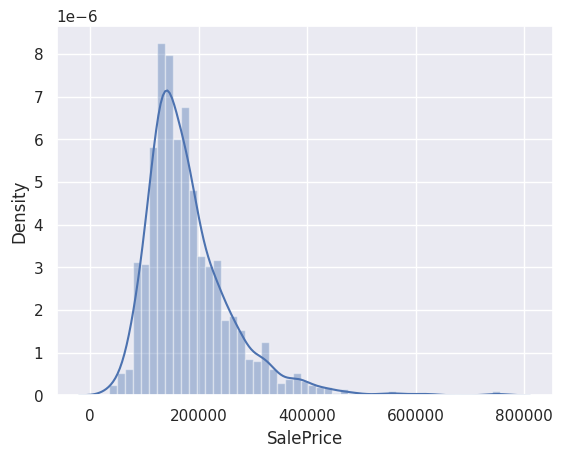

In [ ]:
# 3.6 住宅価格を対数変換

# 対数変換前のヒストグラム、歪度、尖度
sns.distplot(df_train['SalePrice'])
print(f"歪度: {round(df_train['SalePrice'].skew(),4)}" )
print(f"尖度: {round(df_train['SalePrice'].kurt(),4)}" )

In [ ]:
# SalePriceに対数変換した値を入れる。
# np.log()は底がeの対数変換を行う。
df_train['SalePrice'] = np.log(df_train['SalePrice'])

<ipython-input-636-3cf2f3d84e50>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


歪度: 0.1213
尖度: 0.8095


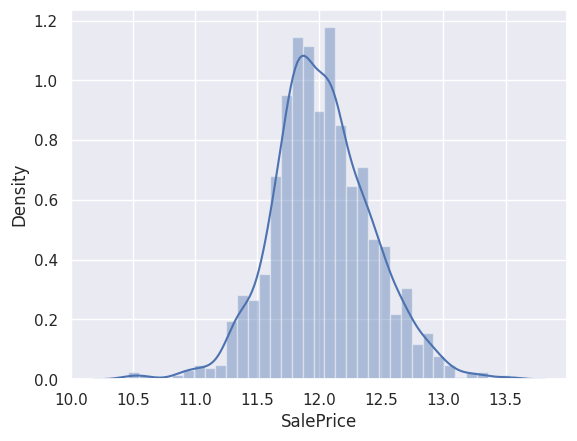

In [ ]:


# 対数変換後のヒストグラム、歪度、尖度
sns.distplot(df_train['SalePrice'])
print(f"歪度: {round(df_train['SalePrice'].skew(),4)}" )
print(f"尖度: {round(df_train['SalePrice'].kurt(),4)}" )

In [ ]:
#print_df_info(df)

In [ ]:
# 3.7 学習データの説明変数と目的変数、予測データの説明変数にデータフレームを分割する。

from sklearn.model_selection import train_test_split

"""
# 学習データ、説明変数
X_train = df_train.drop("SalePrice", axis=1) # train_df.drop(columns = ['SalePrice','SalePriceLog'])

# 学習データ、目的変数
y_train = df_train["SalePrice"]

# 予測データ、目的変数
X_test  = df_test
"""

X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27, shuffle=True)


In [ ]:
print(X_train.shape)#1018
print(X_test.shape)#255
print(y_train.shape)#1018
print(y_test.shape)#255
print(X.shape)#1273
print(y.shape)#1273
print(1018+255)

(1168, 341)
(292, 341)
(1168,)
(292,)
(1460, 341)
(1460,)
1273


In [ ]:
y.head(100)

0     12.247694
1     12.109011
2     12.317167
3     11.849398
4     12.429216
        ...    
95    12.128111
96    12.273731
97    11.458997
98    11.326596
99    11.767180
Name: SalePrice, Length: 100, dtype: float64

In [ ]:
print_df_info(X)

Id, [int64], 1460, [   1    2    3 ... 1458 1459 1460]
LotFrontage, [float64], 111, [ 65.  80.  68.  60.  84.  85.  75.   0.  51.  50.
LotArea, [int64], 1073, [ 8450  9600 11250 ... 17217 13175  9717]
OverallQual, [int64], 10, [ 7  6  8  5  9  4 10  3  1  2]
OverallCond, [int64], 9, [5 8 6 7 4 2 3 9 1]
YearBuilt, [int64], 112, [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939
YearRemodAdd, [int64], 61, [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965
MasVnrArea, [float64], 327, [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02
BsmtFinSF1, [float64], 637, [7.060e+02 9.780e+02 4.860e+02 2.160e+02 6.550e+02
BsmtFinSF2, [float64], 144, [   0.   32.  668.  486.   93.  491.  506.  712.  
BsmtUnfSF, [float64], 780, [ 150.  284.  434.  540.  490.   64.  317.  216.  
TotalBsmtSF, [float64], 721, [ 856. 1262.  920.  756. 1145.  796. 1686. 1107.  
1stFlrSF, [int64], 753, [ 856 1262  920  961 1145  796 1694 1107 1022 1077
2ndFlrSF, [int64], 417, [ 854    0  866  756 1053  566  983  752 1142 12

# ◆ [paCe] 3.Construct Stage

3.1.construct model like Logistic Regression Model, Tree-based Model,

3.2.Results and Evaluation

3.3.increasing the accuracy again

* Feature engineering again :)

In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet, BayesianRidge
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# from jerry
def adj_r2_score(x_train, y_test, y_preds):
    SS_reg = np.sum((y_test - y_preds)**2)
    SS_total = np.sum((y_test - np.mean(y_test))**2)
    r2 = 1-SS_reg/SS_total

    N = len(x_train)
    p = len(x_train.columns)

    adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
    return adj_r2

In [ ]:
from sklearn.metrics import r2_score

# 自由度調整済み決定係数(adjusted R-Squared, R^2f)
# https://www.ritolab.com/posts/245

# 自由度調整済み決定係数とは？意味や解釈、活用法を解説！
# https://best-biostatistics.com/correlation_regression/adjusted-r-square.html
#
"""
決定係数には、たとえ無意味な変数であっても「変数の数が多ければ多いほど値が高くなる」という性質があるため、決定係数よりも、その欠点を補った「自由度調整済み決定係数」を見ていくことが多い。

R2f=1−SSeSSy×n−1n−p−1
R2f=1−決定係数×サンプルサイズ−1サンプルサイズ−説明変数の数−1
自由度調整済み決定係数は scikit-learn に用意されていないので、関数を作成して求めてみます。
"""
def adjusted_r2_score(y_actual, y_pred, number_dimensions):
    """自由度調整済み決定係数出力

    Args:
        y_actual (ndarray): 観察データ
        y_pred (ndarray): 予測データ
        number_dimensions (int): 次元数（説明変数の数）

    Returns:
        float: 自由度調整済み決定係数
    """
    # 決定係数
    coefficient_of_determination = r2_score(y_actual, y_pred)
    # サンプルサイズ
    sample_size = len(y_actual)

    return 1 - (1 - coefficient_of_determination) * (sample_size - 1) / (sample_size - number_dimensions - 1)

In [ ]:
# Regression model
def pred_model(model, x_train, y_train, pred_data):
    reg = model()
    reg.fit(x_train, y_train)

    pred = reg.predict(pred_data)
    return pd.Series(pred)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression

## 評価指標の整理

https://qiita.com/DS27/items/2204b10888a19869e083

**平均絶対誤差（MAE: Mean absolute error）**

→ 予測値と実測値の平均的なズレ（誤差）の大きさ　。０に近いほど良い。大きく予測を外したケースをあまり重要視していない。そのため、MAEを基準として良いモデルを選ぶと最大誤差が大きくなる傾向にある。

**平均二乗誤差(MSE: Mean squared error)**

→ 予測値と実測値のズレの大きさ。０に近いほど良い。予測を大きく外すと、大幅にMSEが大きくなる傾向にある。

**決定係数 (R^2)**

→ 回帰モデルの当てはまりの良さを評価する。1に近いほど良い。

**自由度調整済み決定係数(Adjusted R^2)**

→ 基本的に0~1の値をとる(一部例外あり)
→ 医療統計では0.5を超えれば優秀とみなされることが多い

In [ ]:
# Linear regression
pred = pred_model(LinearRegression, X_train, y_train, X_test)
print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('R2: ', r2_score(y_test, pred))
print('Adjuted_R2: ', adjusted_r2_score(y_test, pred, X_test.shape[1]))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

MAE:  0.09210082183929967
MSE:  0.017465800269325368
R2:  0.8882246590230464
Adjuted_R2:  1.6505324844858702
(1168, 341)
(1168,)
(292, 341)


In [ ]:
# ElasticNet
pred = pred_model(ElasticNet, X_train, y_train, X_test)
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ', r2_score(y_test, pred))
print('Adjuted_R2: ', adjusted_r2_score(y_test, pred, X_test.shape[1]))

# the adjusted r2 is greater than r2. so the elasticnet model might be having a hard time interpreting my features

MAE:  0.11596109434109471
MSE:  0.028428602310095384
R2:  0.8180663543777109
Adjuted_R2:  2.0588538175217224


In [ ]:
# BayesianRidge regression
pred = pred_model(BayesianRidge, X_train, y_train, X_test)
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ', r2_score(y_test, pred))
print('Adjuted_R2: ', adjusted_r2_score(y_test, pred, X_test.shape[1]))

MAE:  0.09295040045163665
MSE:  0.01800862581982603
R2:  0.884750755161637
Adjuted_R2:  1.6707506049592724


In [ ]:
# RandomForest - Round 1
pred = pred_model(RandomForestRegressor, X_train, y_train, X_test)
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ', r2_score(y_test, pred))
print('Adjuted_R2: ', adjusted_r2_score(y_test, pred, X_test.shape[1]))

MAE:  0.10556739612618904
MSE:  0.024463702798541997
R2:  0.8434403989682457
Adjuted_R2:  1.91117687800481


In [ ]:
"""
ソースがどこのものかわからん
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))
plt.plot(y_test.values,label="True")
plt.plot(pred, label="Predicted")
plt.legend()
plt.title('比較')
plt.xlabel('サンプル番号')
plt.ylabel('時間')
plt.show()
"""

'\nソースがどこのものかわからん\nimport matplotlib.pyplot as plt\n%matplotlib inline\n\nplt.figure(figsize=(20,10))\nplt.plot(y_test.values,label="True")\nplt.plot(pred, label="Predicted")\nplt.legend()\nplt.title(\'比較\')\nplt.xlabel(\'サンプル番号\')\nplt.ylabel(\'時間\')\nplt.show()\n'

In [ ]:
# ARDRegressor, HuberRegressor, Lasso
from sklearn.linear_model import ARDRegression, HuberRegressor, Lasso
# ARD
pred = pred_model(ARDRegression, X_train, y_train, X_test)
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ', r2_score(y_test, pred))
print('Adjuted_R2: ', adjusted_r2_score(y_test, pred, X_test.shape[1]))

MAE:  0.1115086673799389
MSE:  0.0232337091493104
R2:  0.8513119512259345
Adjuted_R2:  1.8653644438650612


In [ ]:
# Huber
pred = pred_model(HuberRegressor, X_train, y_train, X_test)
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ', r2_score(y_test, pred))
print('Adjuted_R2: ', adjusted_r2_score(y_test, pred, X_test.shape[1]))

MAE:  0.11457671224720262
MSE:  0.02706041985587835
R2:  0.8268222692502392
Adjuted_R2:  2.007894392963608


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
# Lasso - Round 1
pred = pred_model(Lasso, X_train, y_train, X_test)
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ', r2_score(y_test, pred))
print('Adjuted_R2: ', adjusted_r2_score(y_test, pred, X_test.shape[1]))

MAE:  0.1190311916525806
MSE:  0.03108462440314158
R2:  0.8010686920596574
Adjuted_R2:  2.1577802122127943


## Tune their Hyperparameters

In [ ]:
# GridSearchCVをインポート #
from sklearn.model_selection import GridSearchCV

# 試したいハイパーパラメータを各々に配列で用意
params = {
    'n_estimators'  : [4, 8, 16, 32],
    'max_depth' : [8, 16, 32, 64],
    'n_jobs': [-1]
}

# GridSearchCVにランダムフォレストと試行パラメータを
# 渡してインスタンス作成
cv = GridSearchCV(
    RandomForestRegressor(),
    params,
    verbose=2
)
# トレーニング
cv.fit(X_train, y_train)

# RandomForest - Round 2
# もっとも精度が良かったモデルを取り出して予測
best_radom_forest_model = cv.best_estimator_
best_radom_forest_pred = best_radom_forest_model.predict(X_test)

print("-" * 40)

# 精度検証
mean_absolute_error(y_test, best_radom_forest_pred)
print('MAE: ',mean_absolute_error(y_test, best_radom_forest_pred))
print('MSE: ',mean_squared_error(y_test, best_radom_forest_pred))
print('R2: ', r2_score(y_test, best_radom_forest_pred))
print('Adjuted_R2: ', adjusted_r2_score(y_test, best_radom_forest_pred, X_test.shape[1]))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .............max_depth=8, n_estimators=4, n_jobs=-1; total time=   0.1s
[CV] END .............max_depth=8, n_estimators=4, n_jobs=-1; total time=   0.1s
[CV] END .............max_depth=8, n_estimators=4, n_jobs=-1; total time=   0.1s
[CV] END .............max_depth=8, n_estimators=4, n_jobs=-1; total time=   0.1s
[CV] END .............max_depth=8, n_estimators=4, n_jobs=-1; total time=   0.1s
[CV] END .............max_depth=8, n_estimators=8, n_jobs=-1; total time=   0.1s
[CV] END .............max_depth=8, n_estimators=8, n_jobs=-1; total time=   0.2s
[CV] END .............max_depth=8, n_estimators=8, n_jobs=-1; total time=   0.1s
[CV] END .............max_depth=8, n_estimators=8, n_jobs=-1; total time=   0.1s
[CV] END .............max_depth=8, n_estimators=8, n_jobs=-1; total time=   0.2s
[CV] END ............max_depth=8, n_estimators=16, n_jobs=-1; total time=   0.2s
[CV] END ............max_depth=8, n_estimators=1

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def lasso_tuning(train_x,train_y):
    # alphaパラメータのリスト
    param_list = [0.001, 0.01, 0.1, 1.0, 10.0,100.0,1000.0]

    for cnt,alpha in enumerate(param_list):
        # パラメータを設定したラッソ回帰モデル
        lasso = Lasso(alpha=alpha)
        # パイプライン生成
        pipeline = make_pipeline(StandardScaler(), lasso)

        # 学習データ内でホールドアウト検証のために分割 テストデータの割合は0.3 seed値を0に固定
        X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=0)

        # 学習
        pipeline.fit(X_train,y_train)

        # RMSE(平均誤差)を計算
        train_rmse = np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train)))
        test_rmse = np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test)))
        # ベストパラメータを更新
        if cnt == 0:
            best_score = test_rmse
            best_param = alpha
        elif best_score > test_rmse:
            best_score = test_rmse
            best_param = alpha

    # ベストパラメータのalphaと、そのときのMSEを出力
    print('alpha : ' + str(best_param))
    print('test score is : ' +str(round(best_score,4)))

    # ベストパラメータを返却
    return best_param

# best_alphaにベストパラメータのalphaが渡される。
best_alpha = lasso_tuning(X_train,y_train)

alpha : 0.01
test score is : 0.1187


In [ ]:
# Lasso - Round 2
# ラッソ回帰モデルにベストパラメータを設定
lasso = Lasso(alpha = best_alpha)
# パイプラインの作成
pipeline = make_pipeline(StandardScaler(), lasso)
# 学習
pipeline.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.01))])

最も精度が出たalphaは「0.001」、RMSE(平均二乗平方根誤差)は「0.001」となりました。

# ◆ [pacE] Execute Stage

モデルのパフォーマンスと結果を解釈する

実行可能なステップを関係者と共有する

In [ ]:
""" これが最終エラーの原因か？
# 結果を予測
pred = pipeline.predict(X_test)
print(X_test.shape)
"""
pred = pipeline.predict(df_test)
print(df_test.shape)

(1459, 341)


<ipython-input-659-3f77f0e04996>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred)


歪度: 0.3763
尖度: 0.6703


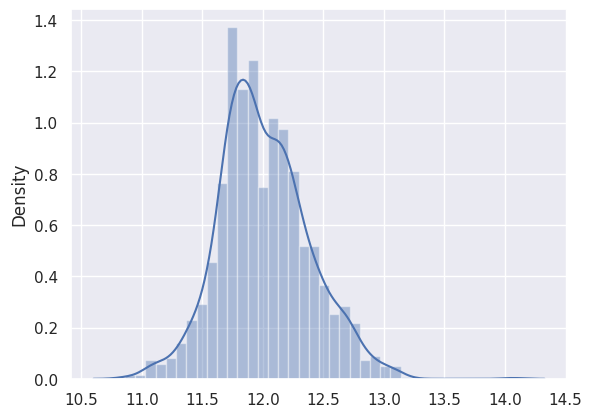

In [ ]:
# 予測結果のプロット
sns.distplot(pred)
# 歪度と尖度
print(f"歪度: {round(pd.Series(pred).skew(),4)}" )
print(f"尖度: {round(pd.Series(pred).kurt(),4)}" )

<ipython-input-660-c2159aa359b4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_exp)


歪度: 3.1976
尖度: 31.2981


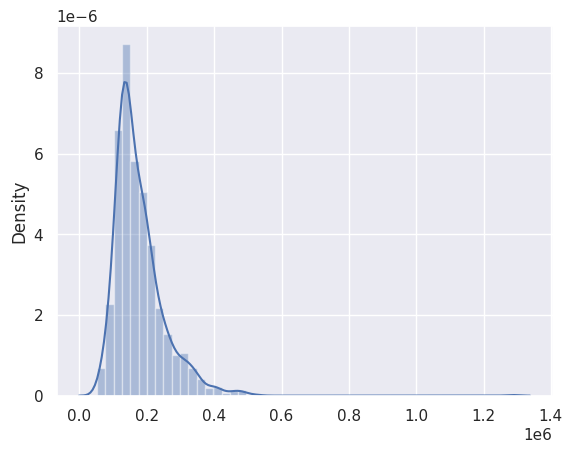

In [ ]:
# 指数変換 戻す。
pred_exp = np.exp(pred)
# 指数変換した予測結果をプロット
sns.distplot(pred_exp)
# 歪度と尖度
print(f"歪度: {round(pd.Series(pred_exp).skew(),4)}" )
print(f"尖度: {round(pd.Series(pred_exp).kurt(),4)}" )



<ipython-input-661-4d273ddd5f04>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_exp_ex_outliars)


歪度: 1.0562
尖度: 0.9577


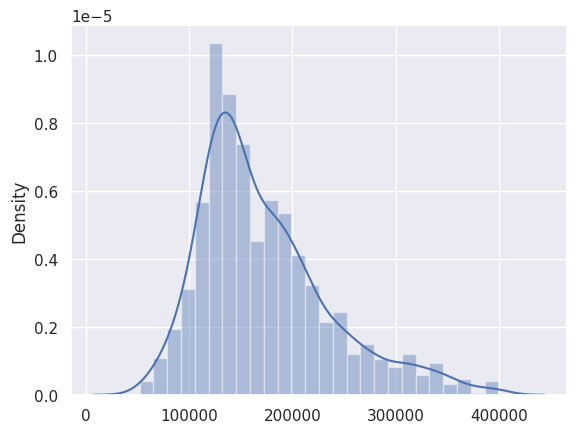

In [ ]:
# 400,000より高い物件は除去
pred_exp_ex_outliars = pred_exp[pred_exp<400000]
# 指数変換した予測結果をプロット
sns.distplot(pred_exp_ex_outliars)
# 歪度と尖度
print(f"歪度: {round(pd.Series(pred_exp_ex_outliars).skew(),4)}" )
print(f"尖度: {round(pd.Series(pred_exp_ex_outliars).kurt(),4)}" )

<ipython-input-662-8e107527a978>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


歪度: 0.1213
尖度: 0.8095


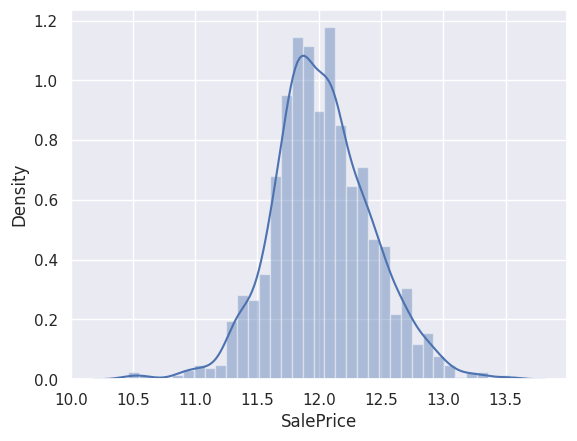

In [ ]:
# 学習データの住宅価格をプロット(外れ値除去済み)
sns.distplot(df_train['SalePrice'])
# 歪度と尖度
print(f"歪度: {round(pd.Series(df_train['SalePrice']).skew(),4)}" )
print(f"尖度: {round(pd.Series(df_train['SalePrice']).kurt(),4)}" )

In [ ]:
# sample_submission.csvの読み込み
df_submission = pd.read_csv('sample_submission.csv')
# sample_submission.csvの形式を確認するために先頭五行を見てみる。
df_submission.head()


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
print(pred_exp)

[123403.81574181 154018.74549224 172825.87900063 ... 163797.10109821
 119209.94566151 230164.83294975]


In [ ]:
print(df_submission.shape)
#print(pred_exp)
print(pred_exp.shape)
#print(pred_exp.describe())
#print(pred_exp.info())

(1459, 2)
(1459,)


In [ ]:
# 指数変換した値を代入
df_submission['SalePrice'] = pred_exp
df_submission.head()

,Id,SalePrice
0,1461,123403.815742
1,1462,154018.745492
2,1463,172825.879001
3,1464,195193.351742
4,1465,189560.178291


In [ ]:
# submission.csvを出力
df_submission.to_csv('submission/submission_3_0814.csv',index=False)

モデルからどのような重要な洞察が得られましたか? 構築されたモデルに基づいて、どのようなビジネス上の推奨事項を提案しますか? あなたのマネージャー/会社に対してどのような提案をする可能性がありますか? モデルを改善できると思いますか? なぜ、あるいはなぜそうではないのでしょうか？どうやって？ 使用していたデータとモデルについて知っていることを踏まえて、他にどのような質問をチームに提供できますか? この段階を完了する際に、どのようなリソースを使用していると思いますか? (必ずリンクを含めてください。) この段階で倫理的な考慮事項はありますか?

ステップ 4. 結果と評価 モデルの解釈 メトリクスを使用してモデルのパフォーマンスを評価する 結果、視覚化、実行可能なステップを準備して関係者と共有する


モデル結果の概要 ロジスティック回帰:

ロジスティック回帰モデルは、テスト セットで精度 80%、再現率 83%、f1 スコア 80% (すべての加重平均)、精度 83% を達成しました。

ツリーベースの機械学習:

特徴エンジニアリングを実施した後、デシジョン ツリー モデルは、テスト セットで AUC 93.8%、精度 87.0%、再現率 90.4%、f1 スコア 88.7%、精度 96.2% を達成しました。ランダム フォレストはデシジョン ツリー モデルをわずかに上回りました。

結論、推奨事項、次のステップ:

このモデルでは、

従業員を維持するには、次の推奨事項を利害関係者に提示できます。

従業員が取り組むことができるプロジェクトの数に上限を設けます。 少なくとも 4 年以上勤続している従業員の昇進を検討するか、勤続 4 年目の従業員がなぜこれほど不満を抱いているのかについてさらに調査を行ってください。 長時間労働した従業員に報酬を与えるか、従業員にそうするよう要求しないでください。 従業員が会社の残業手当ポリシーをよく知らない場合は、そのことを知らせてください。仕事量と休暇に関する期待が明確でない場合は、明確にしてください。 全社およびチーム内でディスカッションを開催し、全体的および特定の状況で会社の労働文化を理解し、それに対処します。 月に 200 時間以上働く従業員に高い評価スコアを与えるべきではありません。より多くの貢献をしたり、より多くの努力をした従業員に報酬を与えるための、比例した規模を検討してください。 次のステップ

データ漏洩について依然として懸念を抱くのは当然かもしれません。last_evaluationがデータから削除されたときに予測がどのように変化するかを考慮することが賢明かもしれません。評価があまり頻繁に実行されない可能性もあります。その場合、この機能を使用せずに従業員の定着率を予測できると便利です。評価スコアによって従業員が退職するか留まるかが決まる可能性もあります。その場合、ピボットしてパフォーマンス スコアを予測しようとすると役立つ可能性があります。満足度スコアについても同様のことが言えます。

別のプロジェクトでは、このデータに基づいて K 平均法モデルを構築し、クラスターを分析してみることができます。これにより、貴重な洞察が得られる可能性があります。



参考にしたサイト

https://nehori.com/nikki/2020/01/03/post-14508/#toc1
https://qiita.com/muscle_nishimi/items/901ed94f3cdf1c8d893a
